In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

Hangul OK in your Windows !!!


## 종목별 헤드라인 불러오기

In [2]:
news = pd.read_csv('C:/Users/seonwook/Documents/crawling_df.csv', index_col=0)
news.head()

,name,headline,date,change
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1
1,삼성전자,재계 총수들의 올해 첫 화두는 ‘위기’ ‘투자’ ‘인재’,2012-01-02,1
2,삼성전자,[경제 굿&노굿] CEO들 신년사로 보는 2012 경제전망,2012-01-02,1
3,삼성전자,재계 빅3 공격적 투자‥나머지는 '흐림',2012-01-02,1
4,삼성전자,오너 3세들 '전진배치' 명과 암,2012-01-02,1


### 데이터 타입 확인

In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419444 entries, 0 to 419443
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   name      419444 non-null  object
 1   headline  419444 non-null  object
 2   date      419444 non-null  object
 3   change    419444 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 16.0+ MB


In [4]:
# 날짜형 변경
news['date'] = pd.to_datetime(news['date'])

## 데이터 EDA

### 전체 주가 변동별 headline 개수

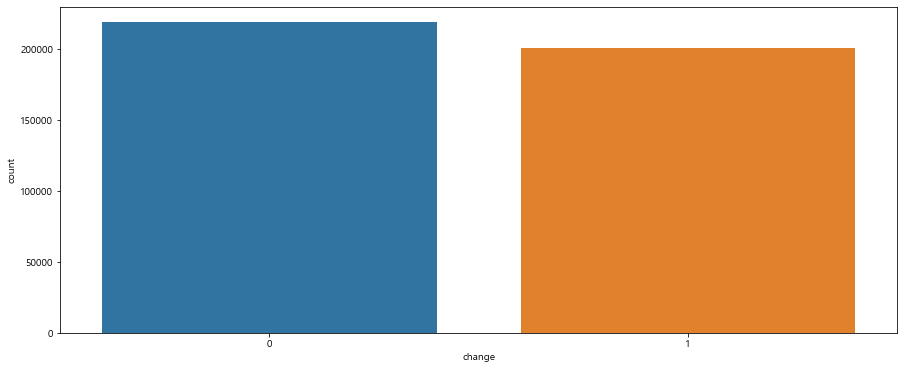

In [5]:
plt.figure(figsize=(15, 6))
sns.countplot(data=news, x='change');

In [6]:
news['change'].value_counts()

0    219001
1    200443
Name: change, dtype: int64

- 거의 균일하지만 그래도 주가 변동이 하락일 때의 기사수가 많은 편이다.

### 종목 주가 변동별 headline 개수

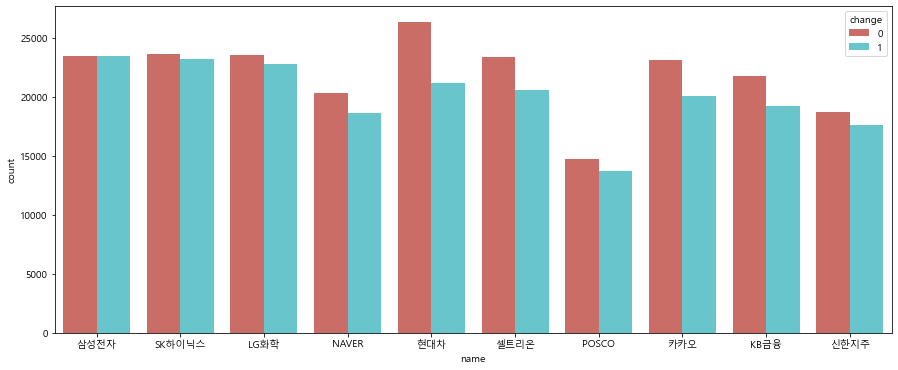

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(x='name', data=news, hue='change', palette='hls');

- 대부분 모든 기업들이 상승보다 하락일 때 기사의 수가 많은 편이다.

### 전체 연도순 주가 변동별 headline 개수

In [8]:
headline_change = pd.crosstab(news['date'].dt.strftime('%Y'), news.change)

In [9]:
headline_change

change,0,1
date,,
2012,21139,18678
2013,22570,19586
2014,22832,20331
2015,22314,19328
2016,20648,19850
2017,21673,22232
2018,24441,20776
2019,21924,20689
2020,19630,19735


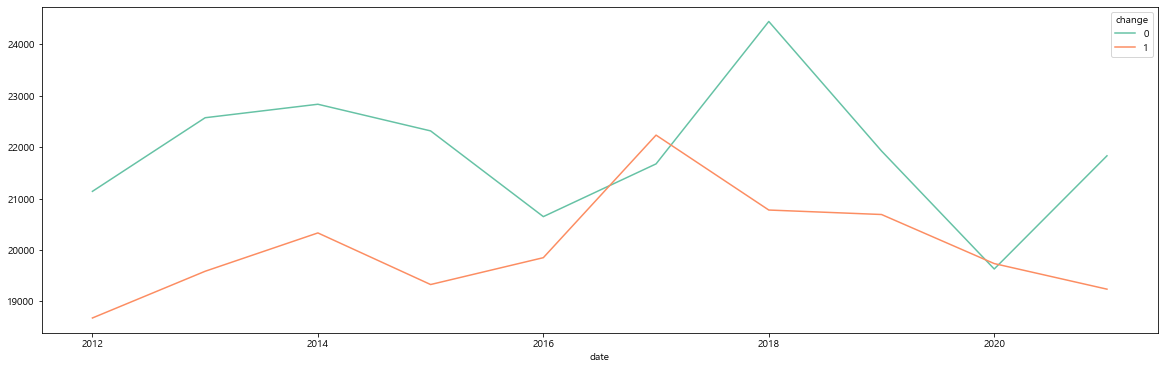

In [10]:
headline_change.plot(color=sns.color_palette('Set2', 8))
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show()

- 주가 변동이 하락일 때는 기사수가 기간 중 2018년도에 가장 많았으며, 상승일 때는 2017년도에 가장 많았다.
- 주가 등락에 상관없이 모두 기사의 수가 많았을 시점 이후로 2020년까지 점점 기사의 수가 줄어들었다.

### 종목 연도순 주가 변동별 headline 개수

In [11]:
headline_name = pd.crosstab(news['date'].dt.strftime('%Y'), [news.name, news.change])

In [12]:
headline_name

name    KB금융        LG화학       NAVER       POSCO       SK하이닉스        삼성전자  \
change     0     1     0     1     0     1     0     1      0     1     0   
date                                                                        
2012    2680  1928  2301  2539  1575  1515  1422  1235   1934  1769  2285   
2013    2503  2006  2616  2100  2006  1543  1520  1366   2402  2378  2494   
2014    2384  2155  2426  1987  2233  2229  1948  1834   2141  2388  2412   
2015    1967  1848  2154  2116  2088  2056  1435  1022   2635  2139  2306   
2016    1945  1756  2182  1883  1952  2000  1066  1377   2428  2293  1998   
2017    2037  2471  2066  2486  2415  1970  1920  1963   2212  2588  2201   
2018    2654  1958  2460  2390  2421  1981  2483  2221   2491  2319  2518   
2019    1949  1581  2373  2452  1419  1348  1842  1425   2332  2509  2255   
2020    1788  1762  2266  2615  1817  1830   400   469   2477  2407  2340   
2021    1850  1784  2703  2228  2407  2143   668   792   2544  2382  2689   

name          셀트리온        신한지주         카카오         현대차        
change     1     0     1     0     1     0     1     0     1  
date                                                          
2012    2381  2408  1884  2550  2105  1398  1202  2586  2120  
2013    2120  2153  1919  2429  2178  2047  1714  2400  2262  
2014    1995  1825  1610  2342  2188  2532  1904  2589  2041  
2015    2306  2333  2006  1941  1784  2757  2064  2698  1987  
2016    2704  2143  2090  1629  1456  2760  2127  2545  2164  
2017    2557  2217  2032  2073  2232  1828  1849  2704  2084  
2018    2184  2537  2298  1609  1421  2464  2021  2804  1983  
2019    2567  2410  2322  2008  2165  2640  2168  2696  2152  
2020    2456  2456  2397  1216   950  2290  2576  2580  2273  
2021    2174  2903  1996   899  1135  2431  2466  2736  2138

In [13]:
name_change_0 = [headline_name.columns[i] for i in range(0, len(headline_name.columns), 2)]
name_change_1 = [headline_name.columns[i] for i in range(1, len(headline_name.columns), 2)]
temp_list = [name_change_0, name_change_1]

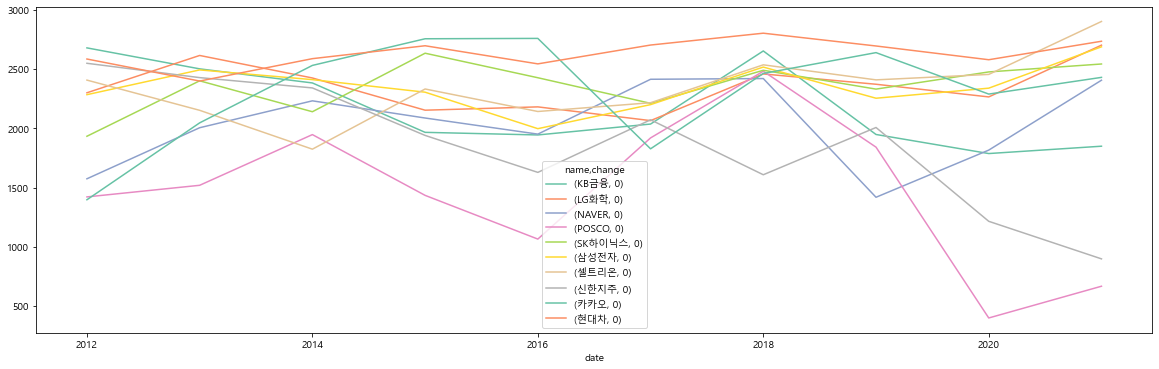

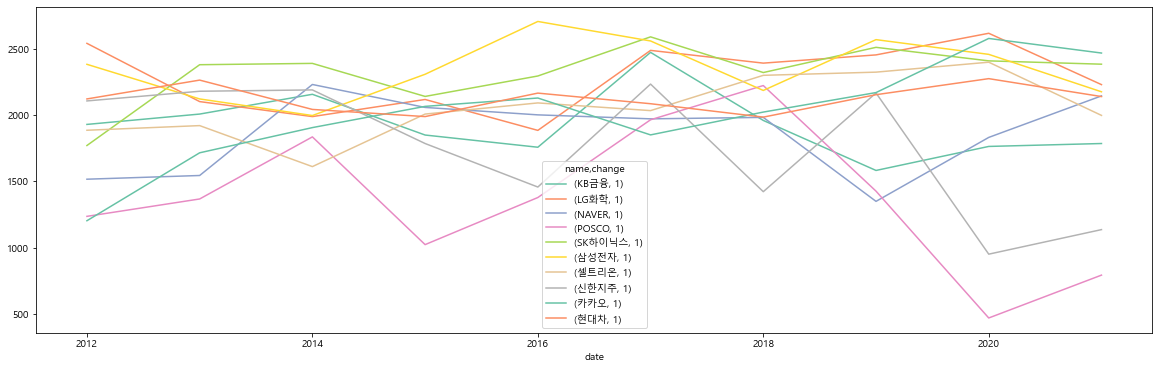

In [14]:
for target in temp_list:
    headline_name[target].plot(color=sns.color_palette('Set2', 8))
    fig=plt.gcf()
    fig.set_size_inches(20,6)
    plt.show()

- 눈에 띄는 부분은 POSCO는 주가 등락에 상관없이 2018~2020년까지 기사의 개수가 계속 감소하다 2020년부터 다시 증가하는 추세였다.

### 전체 주가 변동별 headline 길이

In [16]:
# 뉴스 헤드라인 길이 컬럼 추가
news['length'] = news['headline'].apply(lambda x: len(x))

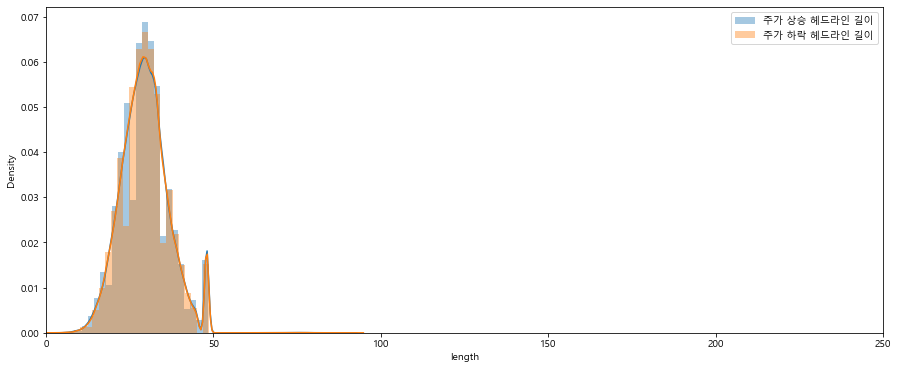

In [17]:
plt.figure(figsize=(15, 6))
up = news.loc[news['change']==1]
down = news.loc[news['change']==0]
sns.distplot(up['length'], label="주가 상승 헤드라인 길이")
sns.distplot(down['length'], label="주가 하락 헤드라인 길이")
plt.xlim(0, 250)
plt.legend()
plt.show()

In [18]:
up['length'].describe()

count    200443.000000
mean         29.643195
std           7.128016
min           2.000000
25%          25.000000
50%          29.000000
75%          34.000000
max          91.000000
Name: length, dtype: float64

In [19]:
down['length'].describe()

count    219001.000000
mean         29.624193
std           7.062838
min           1.000000
25%          25.000000
50%          29.000000
75%          34.000000
max          93.000000
Name: length, dtype: float64

- 전체 데이터로 보았을 땐, headline만을 가져온 데이터다 보니 사실 주가 변동에 따라 텍스트 길이의 큰 차이는 없는 것으로 보인다.

### 종목 주가 변동별 평균 headline 길이

In [20]:
top10list = list(news.name.unique())

In [21]:
mean_length_0 = []; mean_length_1 = []
for comp in top10list:
    mean_length_0.append([comp, news.loc[(news['name'] == comp) & (news['change'] == 0), 'length'].describe()[1]])
    mean_length_1.append([comp, news.loc[(news['name'] == comp) & (news['change'] == 1), 'length'].describe()[1]])

In [22]:
mean_length_0, mean_length_1

([['삼성전자', 28.88484126308622],
  ['SK하이닉스', 30.00059332090185],
  ['LG화학', 30.10026755000637],
  ['NAVER', 30.05488614567452],
  ['현대차', 29.163034398967273],
  ['셀트리온', 30.015266196279665],
  ['POSCO', 30.295429815016323],
  ['카카오', 29.511642977491682],
  ['KB금융', 29.165509950820425],
  ['신한지주', 29.316110397946083]],
 [['삼성전자', 29.00494796109879],
  ['SK하이닉스', 30.006430174348353],
  ['LG화학', 30.023512896999474],
  ['NAVER', 29.87085683588504],
  ['현대차', 28.980475382003394],
  ['셀트리온', 30.08280626642016],
  ['POSCO', 30.460084646818448],
  ['카카오', 29.599123985864317],
  ['KB금융', 29.161982440646266],
  ['신한지주', 29.507437265811287]])

- 주가 등락별로 나누어 종목별 헤드라인의 평균 길이에 대해서 보았으나 거의 28~31사이에 있는 것으로 확인됐다.
- 종목별 간, 종목의 등/하락 간도 큰 차이가 보이지 않았다.

### 전체 연도순 주가 변동별 평균 headline 길이

In [23]:
headline_length = pd.pivot_table(news,
                                index=news['date'].dt.year,
                                columns='change',
                                values='length',
                                aggfunc='mean')

In [24]:
headline_length

change,0,1
date,,
2012,26.137991,26.144073
2013,27.128090,27.225518
2014,27.998248,27.953421
2015,28.483687,28.649886
2016,29.868026,29.809824
2017,30.495178,30.486866
2018,30.998732,30.878947
2019,31.381180,31.395573
2020,31.576210,31.450013


- 연도별 기사 헤드라인의 평균길이가 주가 등락과 상관없이 조금씩 길어졌다.
- 하지만 연도별로도 주가 등락을 기준으로 headline길이를 나누어 보았을 때도 유의미한 차이가 보이지 않았다.

### 종목 연도순 주가 변동별 평균 headline 길이

In [25]:
name_length = pd.pivot_table(news,
                                index=news['date'].dt.year,
                                columns=['change', 'name'],
                                values='length',
                                aggfunc='mean')

In [26]:
name_length

change          0                                                         \
name         KB금융       LG화학      NAVER      POSCO     SK하이닉스       삼성전자   
date                                                                       
2012    26.556716  26.644502  23.911111  26.817862  26.864012  25.827133   
2013    26.854575  27.803517  25.790628  27.439474  27.766445  26.204090   
2014    27.859060  28.185903  28.672190  28.216119  28.299393  27.044362   
2015    28.122522  28.780409  29.150383  28.591638  29.106641  28.122723   
2016    29.372237  30.002291  30.534836  30.262664  30.477759  28.879379   
2017    29.759450  30.988383  31.661284  31.968229  30.265371  29.525670   
2018    31.504898  32.066667  31.128459  32.611760  30.869129  29.117554   
2019    30.295023  31.946481  32.046512  32.479913  31.305317  30.432373   
2020    31.275727  31.934245  32.127133  32.715000  31.674606  31.311538   
2021    31.407027  32.487236  33.877025  33.082335  32.490173  32.126069   

change                                                      1             \
name         셀트리온       신한지주        카카오        현대차       KB금융       LG화학   
date                                                                       
2012    25.452658  26.667843  26.442775  25.918407  26.165456  26.776684   
2013    27.288899  27.616303  28.020518  26.519583  27.117647  27.359524   
2014    28.124932  28.131512  28.338073  27.302820  27.362413  28.311022   
2015    28.705101  27.950026  28.292709  28.024463  27.873377  28.945652   
2016    30.265516  29.980970  30.223188  28.857367  29.164009  30.431227   
2017    30.332882  30.610709  29.798687  30.077663  30.324160  31.045052   
2018    31.151754  31.202610  29.818182  30.628745  31.097038  31.390795   
2019    32.656846  31.733566  30.637121  30.752967  30.641366  31.727569   
2020    32.304153  31.491776  30.796943  31.089535  31.238933  31.637476   
2021    32.513262  31.547275  31.369395  31.926535  31.109865  32.064632   

change                                                                    \
name        NAVER      POSCO     SK하이닉스       삼성전자       셀트리온       신한지주   
date                                                                       
2012    23.763036  26.694737  26.721877  26.087358  25.818471  26.728741   
2013    26.121192  27.401903  27.803616  26.553302  27.698801  27.982553   
2014    28.531180  28.521265  28.085008  27.633584  27.890062  28.247258   
2015    29.310311  28.984344  29.201496  28.160885  29.064307  28.474215   
2016    30.348000  30.100944  30.762320  28.520340  29.903349  30.125000   
2017    31.460914  31.915945  30.300232  28.897927  30.493602  30.928315   
2018    31.019182  32.651959  30.900819  29.536172  31.194517  30.484870   
2019    31.190653  32.367719  31.376644  30.912349  32.391042  31.678984   
2020    31.726230  34.206823  31.874533  31.264251  32.080517  31.193684   
2021    33.436771  33.218434  32.045340  32.135235  32.597695  31.276652   

change                        
name          카카오        현대차  
date                          
2012    26.761231  25.688208  
2013    28.020420  26.133068  
2014    28.008403  26.930426  
2015    28.147771  28.436336  
2016    29.856135  29.364603  
2017    30.312601  29.603647  
2018    30.043543  30.142209  
2019    30.702491  30.993494  
2020    30.647516  30.709635  
2021    31.336577  31.782039

- 연도가 지남에 따라 길이가 조금씩 증가하긴 했지만, 종목별로도 역시 주가 변동간 헤드라인 길이의 유의미한 차이가 보이지 않았다.

- 지금까지는 헤드라인의 개수 또는 헤드라인의 길이만을 통해서 주가 등락의 여부에 따라 분포가 어떻게 되었는지 살펴보았는데 헤드라인 개수나 길이만으로는 등락에 미치는 어떤 유의미한 차이를 자세하게 찾아볼 수 없었다. 따라서 기사 헤드라인의 내용을 탐색해봄으로써 어떤 언어적인 의미가 주가 변동에 영향을 미치는지 알아보기로 했다.